In [ ]:
!pip install pysal
!pip install contextily
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 11.5 MB/s 
     |████████████████████████████████| 116 kB 54.9 MB/s 
     |████████████████████████████████| 5.7 MB 41.2 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 41 kB 667 kB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 243 kB 40.3 MB/s 
     |████████████████████████████████| 147 kB 42.9 MB/s 
     |████████████████████████████████| 220 kB 66.0 MB/s 
     |████████████████████████████████| 60 kB 8.7 MB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 1.0 MB 52.0 MB/s 
     |████████████████████████████████| 179 kB 54.3 MB/s 
     |████████████████████████████████| 2.1 MB 47.9 MB/s 
     |████████████████████████████████| 16.7 MB 34.2 MB/s 
     |████████████████████████████████| 

In [ ]:
# Graphics
import matplotlib.pyplot as plt
import seaborn
from pysal.viz import splot
from splot.esda import plot_moran
import contextily

# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed

/usr/local/lib/python3.7/dist-packages/spaghetti/network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In 2016, the United Kingdom ran a referendum to decide whether to remain in the European Union or to leave the club, the so called “Brexit” vote. We will use the official data from the Electoral Commission at the local authority level on percentage of votes for the Remain and Leave campaigns. There are two distinct datasets we will combine:
*   Electoral Commission data on vote percentages at the local authority level.
*   ONS Local Authority Districts (December 2016) Generalized Clipped Boundaries in the UK WGS84. 





In [ ]:
ref = pd.read_csv("/content/brexit_vote.csv", index_col="Area_Code")
ref.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, E06000031 to E08000036
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       382 non-null    int64  
 1   Region_Code              382 non-null    object 
 2   Region                   382 non-null    object 
 3   Area                     382 non-null    object 
 4   Electorate               382 non-null    int64  
 5   ExpectedBallots          382 non-null    int64  
 6   VerifiedBallotPapers     382 non-null    int64  
 7   Pct_Turnout              382 non-null    float64
 8   Votes_Cast               382 non-null    int64  
 9   Valid_Votes              382 non-null    int64  
 10  Remain                   382 non-null    int64  
 11  Leave                    382 non-null    int64  
 12  Rejected_Ballots         382 non-null    int64  
 13  No_official_mark         382 non-null    int64  
 14  Voting_for_both_a

In [ ]:
ref.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, E06000031 to E08000036
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       382 non-null    int64  
 1   Region_Code              382 non-null    object 
 2   Region                   382 non-null    object 
 3   Area                     382 non-null    object 
 4   Electorate               382 non-null    int64  
 5   ExpectedBallots          382 non-null    int64  
 6   VerifiedBallotPapers     382 non-null    int64  
 7   Pct_Turnout              382 non-null    float64
 8   Votes_Cast               382 non-null    int64  
 9   Valid_Votes              382 non-null    int64  
 10  Remain                   382 non-null    int64  
 11  Leave                    382 non-null    int64  
 12  Rejected_Ballots         382 non-null    int64  
 13  No_official_mark         382 non-null    int64  
 14  Voting_for_both_a

In [ ]:
ref.head()

,id,Region_Code,Region,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
Area_Code,,,,,,,,,,,,,,,,,,,,
E06000031,108,E12000006,East,Peterborough,120892,87474,87469,72.35,87469,87392,34176,53216,77,0,32,7,38,39.11,60.89,0.09
E06000032,109,E12000006,East,Luton,127612,84633,84636,66.31,84616,84481,36708,47773,135,0,85,0,50,43.45,56.55,0.16
E06000033,112,E12000006,East,Southend-on-Sea,128856,93948,93939,72.90,93939,93870,39348,54522,69,0,21,0,48,41.92,58.08,0.07
E06000034,113,E12000006,East,Thurrock,109897,79969,79954,72.75,79950,79916,22151,57765,34,0,8,3,23,27.72,72.28,0.04
E06000055,110,E12000006,East,Bedford,119530,86136,86136,72.06,86135,86066,41497,44569,69,0,26,1,42,48.22,51.78,0.08


In [ ]:
lads = gpd.read_file("/content/local_authority_districts.geojson").set_index("lad16cd")

In [ ]:
lads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 391 entries, E06000001 to W06000023
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    391 non-null    int64   
 1   lad16nm     391 non-null    object  
 2   lad16nmw    22 non-null     object  
 3   bng_e       391 non-null    int64   
 4   bng_n       391 non-null    int64   
 5   long        391 non-null    float64 
 6   lat         391 non-null    float64 
 7   st_areasha  391 non-null    float64 
 8   st_lengths  391 non-null    float64 
 9   geometry    391 non-null    geometry
dtypes: float64(4), geometry(1), int64(3), object(2)
memory usage: 33.6+ KB


Although there are several variables that could be considered, we will focus on *Pct_Leave*, which measures the proportion of votes for the Leave alternative.

In [ ]:
db = gpd.GeoDataFrame(
        lads.join(ref[["Pct_Leave"]]), crs=lads.crs
    )

In [ ]:
db

,objectid,lad16nm,lad16nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Pct_Leave
lad16cd,,,,,,,,,,,
E06000001,1,Hartlepool,None,447157,531476,-1.27023,54.676159,0.013041,0.879421,"MULTIPOLYGON (((-1.27024 54.72716, -1.38088 54...",69.57
E06000002,2,Middlesbrough,None,451141,516887,-1.21099,54.544670,0.007484,0.535764,"MULTIPOLYGON (((-1.23001 54.58410, -1.28158 54...",65.48
E06000003,3,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,0.034014,1.266847,"MULTIPOLYGON (((-1.13716 54.64693, -1.13256 54...",66.19
E06000004,4,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,0.028479,1.424195,"MULTIPOLYGON (((-1.31774 54.64524, -1.38088 54...",61.73
E06000010,10,"Kingston upon Hull, City of",None,511894,431716,-0.30380,53.769791,0.009740,0.782168,"MULTIPOLYGON (((-0.31613 53.81325, -0.35366 53...",67.62
...,...,...,...,...,...,...,...,...,...,...,...
W06000018,385,Caerphilly,Caerffili,317245,195259,-3.19753,51.650009,0.036040,1.302514,"POLYGON ((-3.30131 51.79897, -3.31009 51.79430...",57.63
W06000019,386,Blaenau Gwent,Blaenau Gwent,318236,206771,-3.18592,51.753639,0.014163,0.760273,"POLYGON ((-3.24823 51.81515, -3.31009 51.79430...",62.03
W06000021,388,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.778271,0.110769,2.590144,"MULTIPOLYGON (((-3.05214 51.97294, -3.06736 51...",49.56


In [ ]:
db = (
    gpd.GeoDataFrame(
        lads.join(ref[["Pct_Leave"]]), crs=lads.crs
    )
    .to_crs(epsg=3857)[
        ["objectid", "lad16nm", "Pct_Leave", "geometry"]
    ]
    .dropna()
)
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 380 entries, E06000001 to W06000023
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   objectid   380 non-null    int64   
 1   lad16nm    380 non-null    object  
 2   Pct_Leave  380 non-null    float64 
 3   geometry   380 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 14.8+ KB


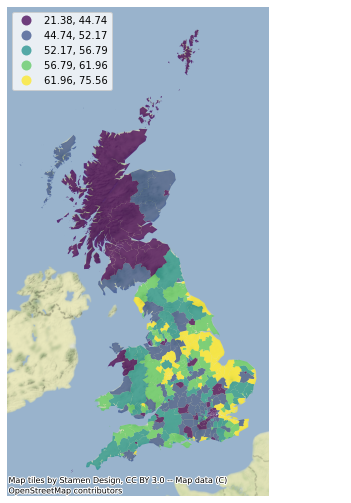

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(
    column="Pct_Leave",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds={"loc": 2},
    ax=ax,
)
contextily.add_basemap(
    ax,
    crs=db.crs,
    source=contextily.providers.Stamen.TerrainBackground,
)
ax.set_axis_off()

The map above is a good way to begin exploring the main spatial patterns in the data. At first sight, it appears to display a fair amount of positive spatial autocorrelation: local authorities with high percentages of votes to leave the EU tend to be next to each other (see, for instance, the eastern region), as are those where a much smaller proportion of their population voted to leave (with Scotland being a good example in the north)

In [ ]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(db, k=8)
# Row-standardization
w.transform = "R"

In [ ]:
w

In [ ]:
db["Pct_Leave_lag"] = weights.spatial_lag.lag_spatial(
    w, db["Pct_Leave"]
)

In [ ]:
db.loc[["E08000012", "S12000019"], ["Pct_Leave", "Pct_Leave_lag"]]

,Pct_Leave,Pct_Leave_lag
lad16cd,,
E08000012,41.81,54.61375
S12000019,37.94,38.01875


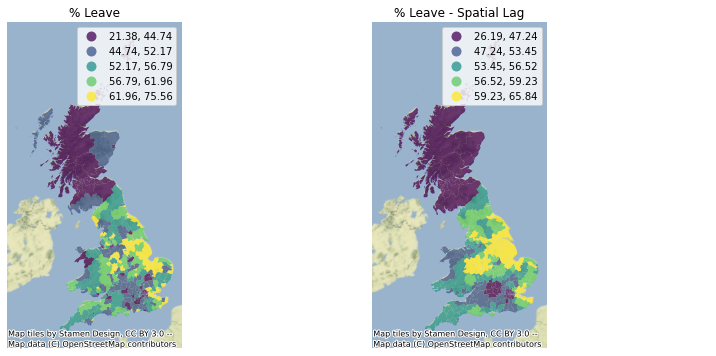

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs

db.plot(
    column="Pct_Leave",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    ax=ax1,
)
ax1.set_axis_off()
ax1.set_title("% Leave")
contextily.add_basemap(
    ax1,
    crs=db.crs,
    source=contextily.providers.Stamen.TerrainBackground,
)

db.plot(
    column="Pct_Leave_lag",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    ax=ax2,
)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
contextily.add_basemap(
    ax2,
    crs=db.crs,
    source=contextily.providers.Stamen.TerrainBackground,
)

plt.show()

Stark differences on the left between immediate neighbors (as in the case of Liverpool, in the NW of England) are diminished on the map in the right. Thus, as discussed above, the spatial lag can also smooth out the differences between nearby observations.

In [ ]:
db["Leave"] = (db["Pct_Leave"] > 50).astype(int)
db[["Pct_Leave", "Leave"]].tail()

,Pct_Leave,Leave
lad16cd,,
W06000018,57.63,1
W06000019,62.03,1
W06000021,49.56,0
W06000022,55.99,1
W06000023,53.74,1


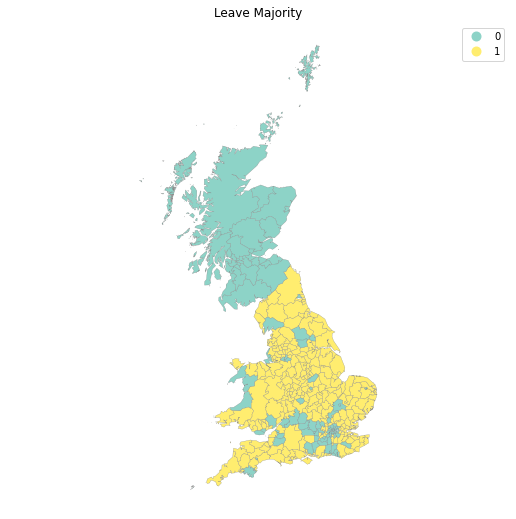

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(
    ax=ax,
    column="Leave",
    categorical=True,
    legend=True,
    edgecolor="0.5",
    linewidth=0.25,
    cmap="Set3",
    figsize=(9, 9),
)
ax.set_axis_off()
ax.set_title("Leave Majority")
plt.axis("equal")
plt.show()

Visually, it appears that the map represents a clear case of positive spatial autocorrelation: overall, there are few visible cases where a given observation is surrounded by others in the opposite category.

In [ ]:
w.transform = "O"
w.transform 

'O'

In [ ]:
seed(1234)
jc = esda.join_counts.Join_Counts(db["Leave"], w)
jc

In [ ]:
jc.bb

871.0

In [ ]:
jc.ww

302.0

In [ ]:
jc.bw

347.0

In [ ]:
jc.bb + jc.ww + jc.bw
jc.J

1520.0

The statistic is based on comparing the actual number of joins of each class (bb, ww, bc) with what one would expect in a case of spatial randomness. Those expectations can be accessed as well, for the GG/YY case:

In [ ]:
jc.mean_bb

727.4124124124124

In [ ]:
jc.mean_bw

649.3233233233233

Statistical inference to obtain a sense of whether these values are likely to come from random chance or not can be accessed using random spatial permutations of the observed values to create synthetic maps under the null hypothesis of complete spatial randomness. esda generates 999 such synthetic patterns and then uses the distribution of join counts from these patterns to generate pseudo-pvalues for our observed join count statistics:

In [ ]:
jc.p_sim_bb

In [ ]:
jc.p_sim_bw

These results point to a clear presence of positive spatial autocorrelation, as there are a lot more joins of pairs in the same category than one would expect (p_sim_bb) and significantly less of opposite joins (p_sim_bw).

In [ ]:
db["Pct_Leave_std"] = db["Pct_Leave"] - db["Pct_Leave"].mean()
db["Pct_Leave_lag_std"] = (
    db["Pct_Leave_lag"] - db["Pct_Leave_lag"].mean()
)

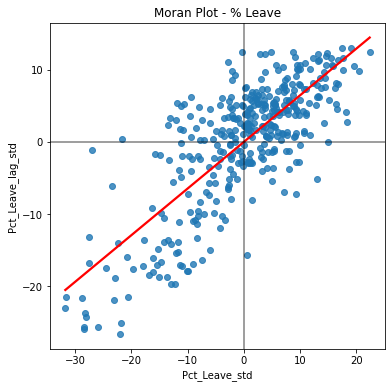

In [ ]:
f, ax = plt.subplots(1, figsize=(6, 6))
seaborn.regplot(
    x="Pct_Leave_std",
    y="Pct_Leave_lag_std",
    ci=None,
    data=db,
    line_kws={"color": "r"},
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - % Leave")
plt.show()

The figure above displays the relationship between the standardized “Leave” voting percentage in a local authority and its spatial lag which, because the W used is row-standardized, can be interpreted as the average standardized density of the percent Leave vote in the neighborhood of each observation

The plot displays a positive relationship between both variables. This is indicates the presence of positive spatial autocorrelation: similar values tend to be located close to each other. This means that the overall trend is for high values to be close to other high values, and for low values to be surrounded by other low values.


local authorities where people voted in high proportion to leave the EU tend to be located nearby other regions that also registered high proportions of Leave vote. In other words, we can say the percentage of Leave votes is spatially autocorrelated in a positive way.

In [ ]:
w.transform = "R"
moran = esda.moran.Moran(db["Pct_Leave"], w)

In [ ]:
moran.I

0.6454521298096587

The other bit of information we will extract from Moran’s I relates to statistical inference: how likely is the pattern we observe in the map and Moran’s I captures in its value to be generated by an entirely random process? If we considered the same variable but shuffled its locations randomly, would we obtain a map with similar characteristics? To obtain insight into these questions, esda performs a simulation and returns a measure of certainty about how likely it is to obtain a pattern like the one we observe under a spatially random process. This is summarized in the p_sim attribute:

In [ ]:
moran.p_sim

0.001

The value is calculated as an empirical p-value that represents the proportion of realizations in the simulation under spatial randomness that are more extreme than the observed value. A small enough p-value associated with the Moran’s I of a map allows to reject the hypothesis that the map is random. In other words, we can conclude that the map displays more spatial pattern than we would expect if the values had been randomly allocated to a locations

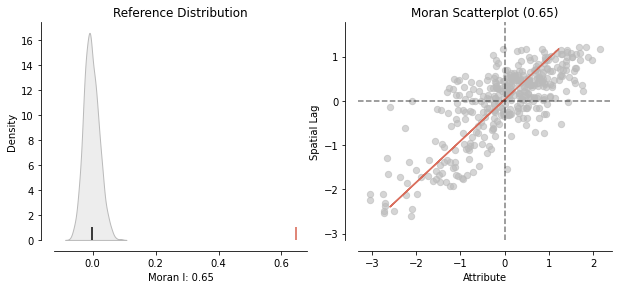

In [ ]:
plot_moran(moran);

Despite their importance, global measures of spatial autocorrelation are “whole map” statistics. They provide a single summary for an entire data set. For example, Moran’s  is a good tool to summarize a dataset into a single value that captures the degree of geographical clustering (or dispersion, if negative)

In [ ]:
lisa = esda.moran.Moran_Local(db["Pct_Leave"], w)

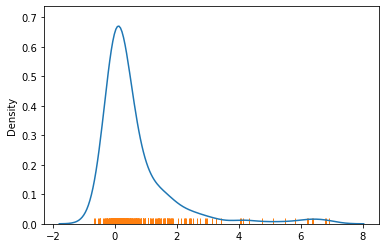

In [ ]:
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

The figure reveals a rather skewed distribution of local Moran’s  statistics. This outcome is due to the dominance of positive forms of spatial association, implying most of the local statistic values will be positive. Here it is important to keep in mind that the high positive values arise from value similarity in space, and this can be due to either high values being next to high values or low values next to low values. The local Moran values alone cannot distinguish these two cases.

The values in the left tail of the density represent locations displaying negative spatial association. There are also two forms, a high value surrounded by low values, or a low value surrounded by high valued neighboring observation

In [ ]:
from splot import esda as esdaplot

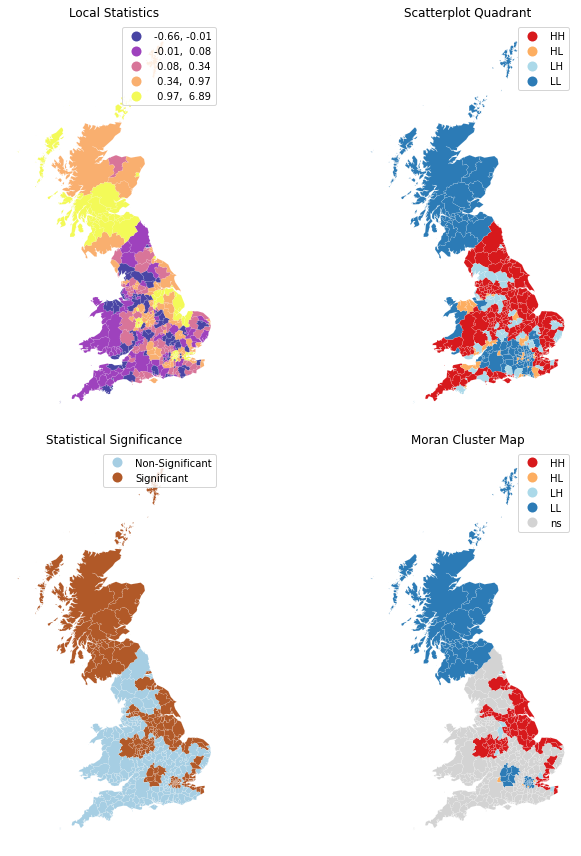

In [ ]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
db.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quandrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, db, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=db.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
db.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quandrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, db, p=0.05, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimise in-betwee white space
f.tight_layout()

# Display the figure
plt.show()

The purple and yellow locations in the top-right map display the largest magnitude (positive and negative values) for the local statistics . Yet, remember this signifies positive spatial autocorrelation, which can be of high or low values. This map thus cannot distinguish between areas with low support for the Brexit vote and those highly in favour.

To distinguish between these two cases, the map in the upper-right shows the location of the LISA statistic in the quadrant of the Moran Scatter plot. This indicates whether the positive (or negative) local association exists within a specific quadrant, such as the High-High quadrant.

In [ ]:
counts = pd.value_counts(lisa.q)
counts

1    183
3    113
2     50
4     34
dtype: int64

 1 represents observations in the HH quadrant, 2 those in the LH one, 3 in the LL region, and 4 in the HL quadrant. 

Showing that the high-high (1), and low-low (3), values are predominant. Care must be taken, however, in the interpretation of these first two maps, as the underlying statistical significance of the local values has not been considered. We have simply mapped the raw LISA value alongside the quadrant in which the local statistic resides. To statistical significance, the bottom left map distinguishes those polygons whose pseudo p-value is above (“Non-Significant”) or below (“Significant”) the threshold value of 5% we use in this context. An examination of the map suggests that quite a few local authorities have local statistics that are small enough so as to be compatible with pure chance.

In [ ]:
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

43.94736842105263

we identify three clear areas of low support for leaving the EU: Scotland, London, and the area around Oxford (North-West of London). And third, although there appeared to be many areas with concentrated values indicating high support, it is only the region in the North-East and West of England whose spatial concentration shows enough strength to reasonably rule out pure chance.